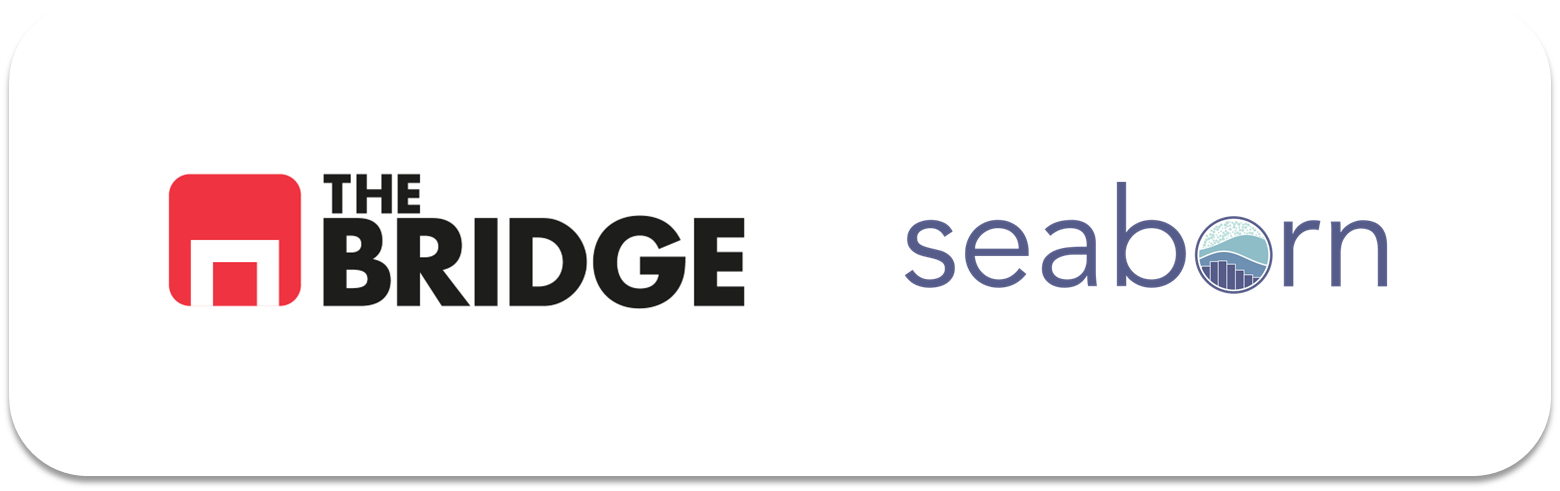

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [15]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as viz

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")  # Estilo para Seaborn
plt.rcParams["figure.figsize"] = (10, 6)  # Tamaño de las figuras

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [16]:
# Ruta del dataset
file_path = r"C:\Users\anton\SUBIR_EJERCICIOS_THEBRIDGE\EJERCICIOS_THEBRIDGE\Analisis_de_Datos\Sprint-08\Unidad_02\Practica_Obligatoria\data\california_cities.csv"

# Cargar el dataset
df_california = pd.read_csv(file_path)

# Eliminar filas con valores nulos
df_california.dropna(inplace=True)

# Mostrar las primeras filas del dataset limpio
print(df_california.head())

   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   
5           5   AlisoViejo  33.575000 -117.725556        127.0         417.0   
6           6      Alturas  41.487222 -120.542500       1332.0        4370.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
4             83089             7.632            7.631             0.001   
5             47823             7.472            7.472             0.000   
6              2827             2.449            2.435             0.014   

   area_total_km2  area_land_km2  area_water_km2  area_water_p

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [17]:


def scatter_plot(df, x_col, y_col, color_col=None, size_col=None, scale=1, show_legend=False):
    """
    Función para pintar diagramas de dispersión.
    
    Args:
    - df (pd.DataFrame): DataFrame con los datos.
    - x_col (str): Columna para el eje X.
    - y_col (str): Columna para el eje Y.
    - color_col (str, opcional): Columna categórica para definir los colores.
    - size_col (str, opcional): Columna para definir el tamaño de los puntos.
    - scale (float): Factor para escalar el tamaño de los puntos.
    - show_legend (bool): Si True, muestra una leyenda o un colorbar.
    """
    plt.figure(figsize=(12, 8))
    
    # Determinar el tamaño de los puntos
    if size_col:
        sizes = df[size_col] * scale
    else:
        sizes = 50  # Tamaño por defecto

    # Crear el gráfico de dispersión
    if color_col:
        scatter = plt.scatter(df[x_col], df[y_col], c=df[color_col], s=sizes, alpha=0.6, cmap="viridis")
        if show_legend:
            plt.colorbar(scatter, label=color_col)
    else:
        plt.scatter(df[x_col], df[y_col], s=sizes, alpha=0.6)
    
    # Configurar etiquetas y título
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Diagrama de dispersión: {x_col} vs {y_col}")
    
    if show_legend and not color_col:
        plt.legend(title="Tamaño")

    plt.grid(True)
    plt.show()


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

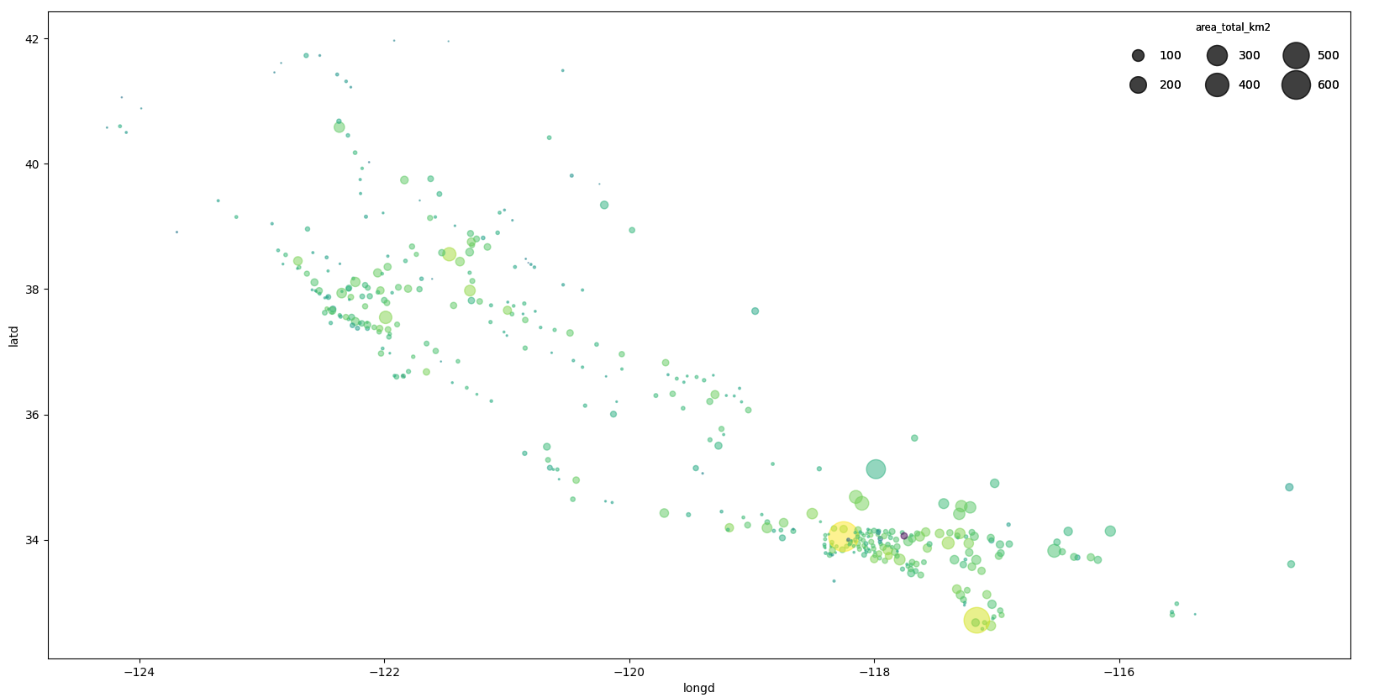

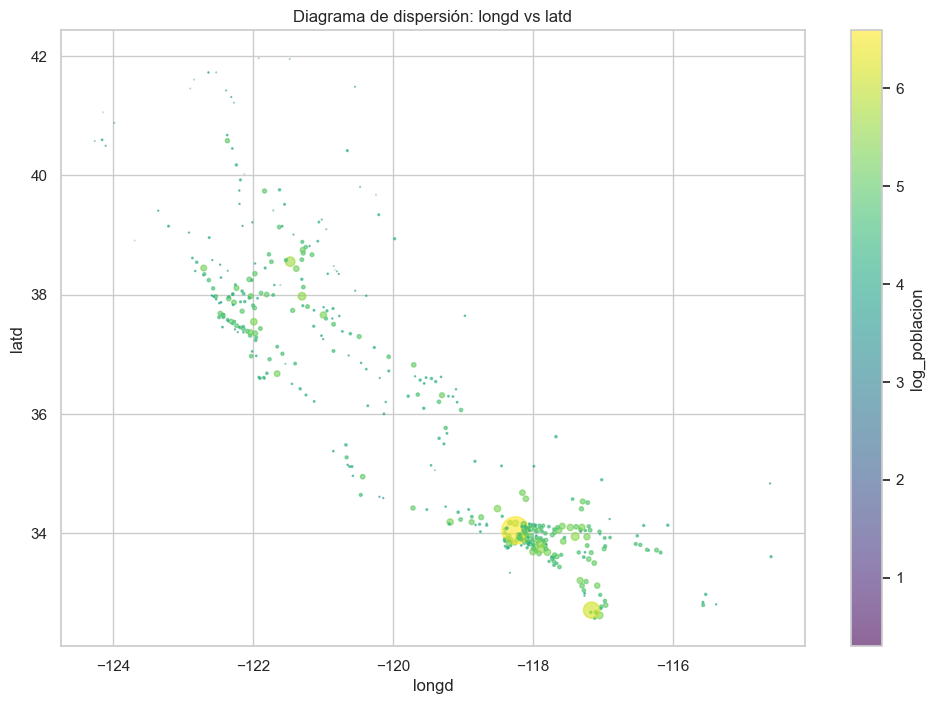

In [18]:
# Crear una nueva columna con el logaritmo decimal de la población
df_california["log_poblacion"] = np.log10(df_california["population_total"] + 1)

# Generar el diagrama de dispersión
scatter_plot(
    df=df_california,
    x_col="longd",  # Longitud en el eje X
    y_col="latd",   # Latitud en el eje Y
    color_col="log_poblacion",  # Colores según logaritmo de población
    size_col="population_total",  # Tamaño según población
    scale=0.0001,  # Escala para ajustar el tamaño de los puntos
    show_legend=True  # Mostrar leyenda para los colores
)


## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [19]:
# Configuración general
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar el dataset
titanic_path = r"C:\Users\anton\SUBIR_EJERCICIOS_THEBRIDGE\EJERCICIOS_THEBRIDGE\Analisis_de_Datos\Sprint-08\Unidad_02\Practica_Obligatoria\data\titanic.csv"
df_titanic = pd.read_csv(titanic_path)

# Vista previa del dataset
print(df_titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


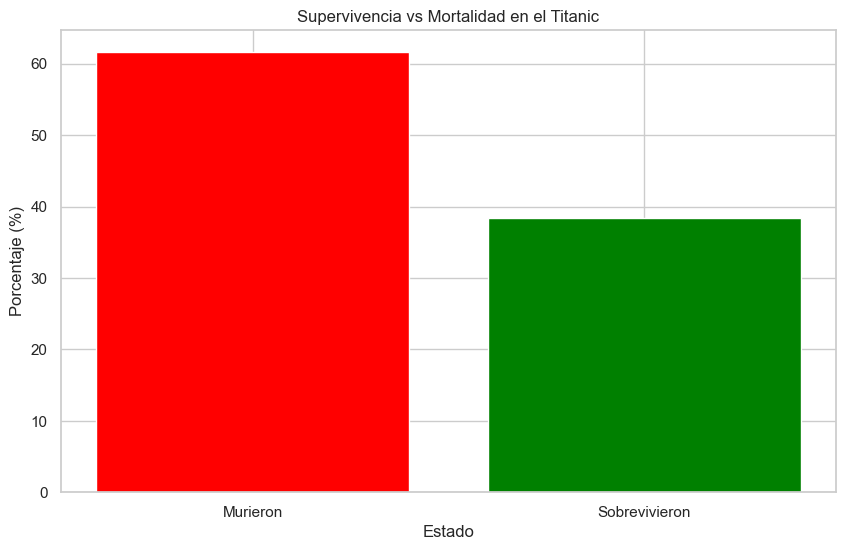

In [20]:
# Calcular tasa de supervivencia
survival_rates = df_titanic["survived"].value_counts(normalize=True) * 100

# Preparar datos para el gráfico
categories = ["Murieron", "Sobrevivieron"]
values = survival_rates.values

# Crear el gráfico de barras
plt.bar(categories, values, color=["red", "green"])  # Asignar colores directamente
plt.title("Supervivencia vs Mortalidad en el Titanic")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Estado")
plt.show()


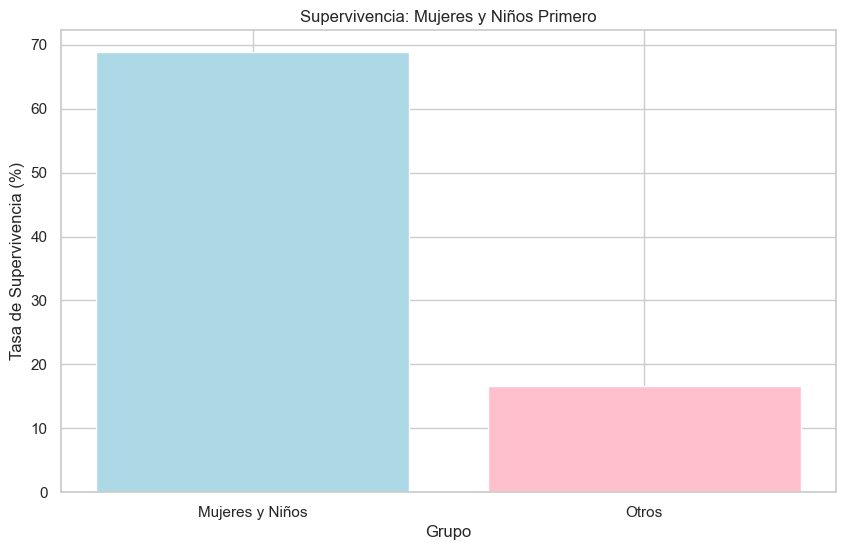

In [30]:
import matplotlib.pyplot as plt

# Crear una nueva columna clasificando Mujeres y Niños vs Otros
df_titanic["grupo"] = df_titanic.apply(
    lambda row: "Mujeres y Niños" if (row["sex"] == "female" or (row["sex"] == "male" and row["age"] < 18)) else "Otros",
    axis=1
)

# Calcular la tasa de supervivencia por grupo
mujeres_niños_data = df_titanic.groupby("grupo")["survived"].mean() * 100

# Preparar los datos para el gráfico
categories = mujeres_niños_data.index.tolist()
values = mujeres_niños_data.values

# Crear el gráfico de barras
plt.bar(categories, values, color=["lightblue", "pink"])  # Colores para cada grupo
plt.title("Supervivencia: Mujeres y Niños Primero")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Grupo")
plt.show()


In [27]:
print(df_titanic.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


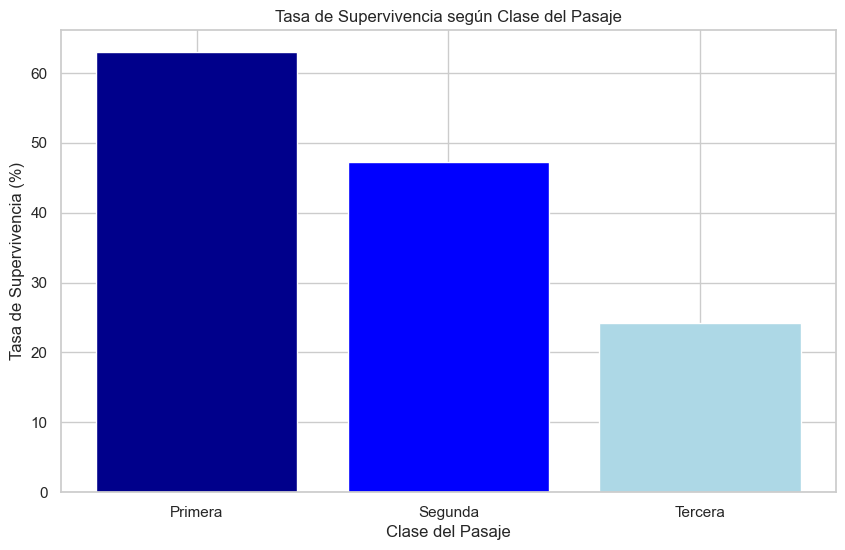

In [23]:
# Calcular las tasas de supervivencia por clase
class_data = df_titanic.groupby("pclass")["survived"].mean() * 100
categories = ["Primera", "Segunda", "Tercera"]
values = class_data.values

# Crear el gráfico de barras
plt.bar(categories, values, color=["darkblue", "blue", "lightblue"])  # Colores directos
plt.title("Tasa de Supervivencia según Clase del Pasaje")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Clase del Pasaje")
plt.show()


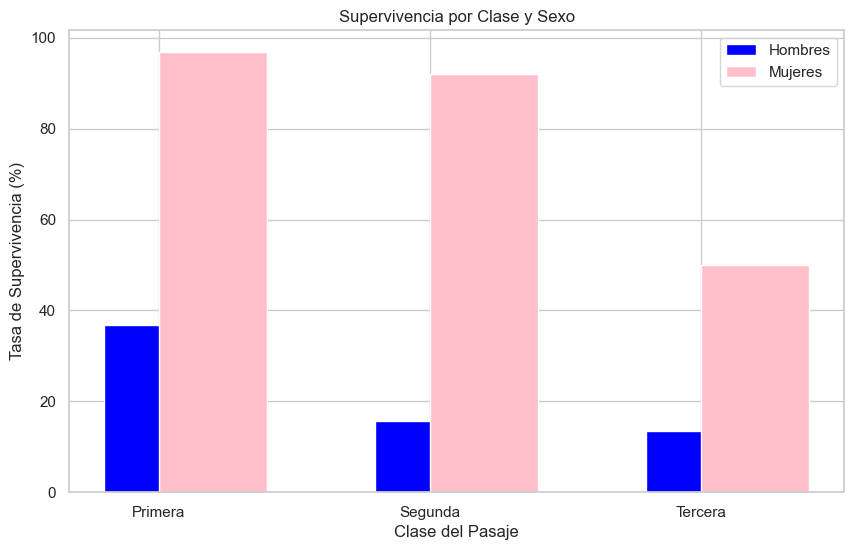

In [24]:
# Preparar datos para el gráfico
class_sex_data = df_titanic.groupby(["pclass", "sex"])["survived"].mean().unstack() * 100
categories = ["Primera", "Segunda", "Tercera"]
male_values = class_sex_data["male"].values
female_values = class_sex_data["female"].values

# Crear el gráfico de barras apiladas
x = range(len(categories))
width = 0.4

plt.bar(x, male_values, width=width, label="Hombres", color="blue", align="center")
plt.bar(x, female_values, width=width, label="Mujeres", color="pink", align="edge")
plt.xticks(x, categories)
plt.title("Supervivencia por Clase y Sexo")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Clase del Pasaje")
plt.legend()
plt.show()

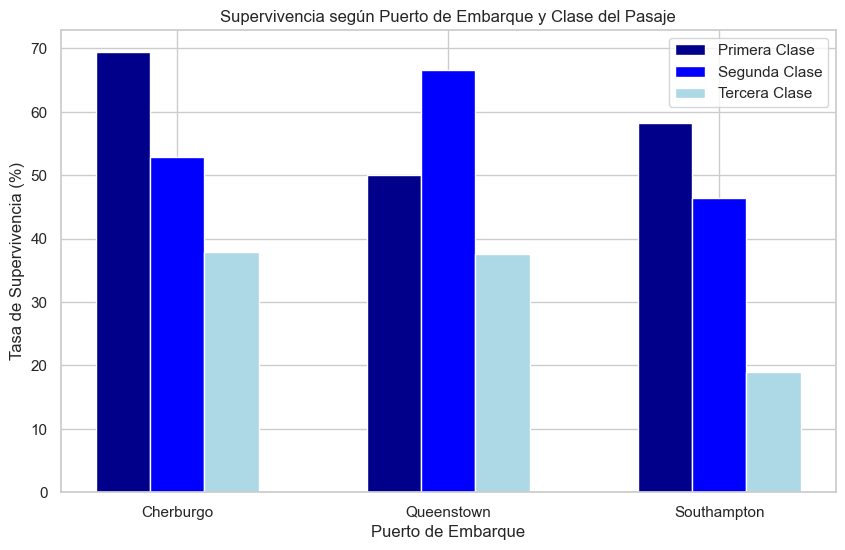

In [25]:
# Preparar datos para el gráfico
embarked_class_data = df_titanic.groupby(["embarked", "pclass"])["survived"].mean().unstack() * 100
ports = ["Cherburgo", "Queenstown", "Southampton"]
first_class = embarked_class_data[1].values
second_class = embarked_class_data[2].values
third_class = embarked_class_data[3].values

# Crear el gráfico de barras agrupadas
x = range(len(ports))
width = 0.2

plt.bar([i - width for i in x], first_class, width=width, label="Primera Clase", color="darkblue")
plt.bar(x, second_class, width=width, label="Segunda Clase", color="blue")
plt.bar([i + width for i in x], third_class, width=width, label="Tercera Clase", color="lightblue")
plt.xticks(x, ports)
plt.title("Supervivencia según Puerto de Embarque y Clase del Pasaje")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Puerto de Embarque")
plt.legend()
plt.show()

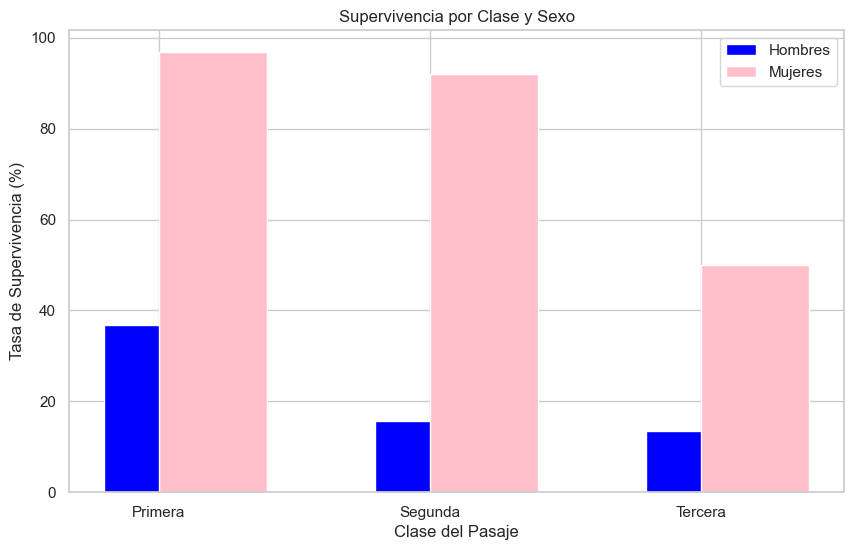

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (2,).

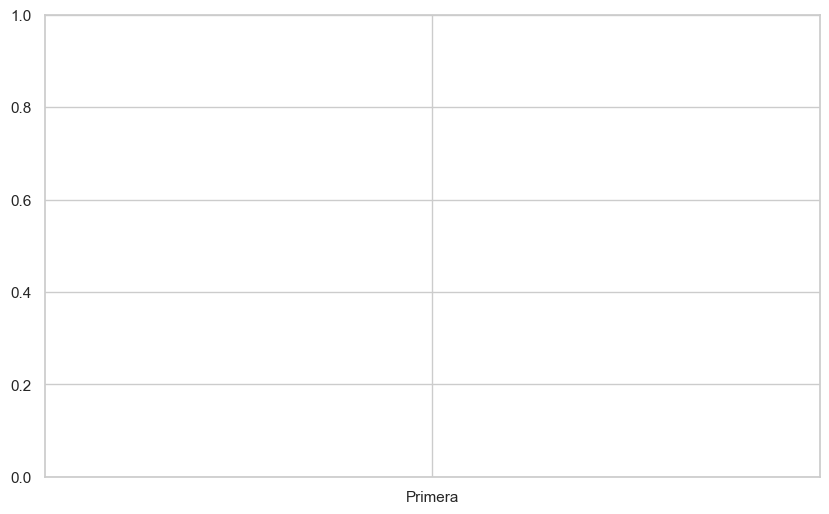

In [32]:
import os

# Crear carpeta para guardar las gráficas
output_dir = "Titanic_Graphics"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Gráfico 1: Tasa de Mortalidad
survival_rates = df_titanic["survived"].value_counts(normalize=True) * 100
categories = ["Murieron", "Sobrevivieron"]
values = survival_rates.values

plt.figure()
plt.bar(categories, values, color=["red", "green"])
plt.title("Supervivencia vs Mortalidad en el Titanic")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Estado")
plt.savefig(os.path.join(output_dir, "tasa_mortalidad.png"))
plt.close()

# Preparar datos para el gráfico
class_sex_data = df_titanic.groupby(["pclass", "sex"])["survived"].mean().unstack() * 100
categories = ["Primera", "Segunda", "Tercera"]
male_values = class_sex_data["male"].values
female_values = class_sex_data["female"].values

# Crear el gráfico de barras apiladas
x = range(len(categories))
width = 0.4

plt.bar(x, male_values, width=width, label="Hombres", color="blue", align="center")
plt.bar(x, female_values, width=width, label="Mujeres", color="pink", align="edge")
plt.xticks(x, categories)
plt.title("Supervivencia por Clase y Sexo")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Clase del Pasaje")
plt.legend()
plt.show()

plt.figure()
plt.bar(categories, values, color=["lightblue", "pink"])
plt.title("Supervivencia: Mujeres y Niños Primero")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Grupo")
plt.savefig(os.path.join(output_dir, "mujeres_niños.png"))
plt.close()

# Gráfico 3: Influencia de la clase
class_data = df_titanic.groupby("pclass")["survived"].mean() * 100
categories = ["Primera", "Segunda", "Tercera"]
values = class_data.values

plt.figure()
plt.bar(categories, values, color=["darkblue", "blue", "lightblue"])
plt.title("Tasa de Supervivencia según Clase del Pasaje")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Clase del Pasaje")
plt.savefig(os.path.join(output_dir, "influencia_clase.png"))
plt.close()

# Gráfico 4: Relación entre clase y género
class_sex_data = df_titanic.groupby(["pclass", "sex"])["survived"].mean().unstack() * 100
categories = ["Primera", "Segunda", "Tercera"]
male_values = class_sex_data["male"].values
female_values = class_sex_data["female"].values
x = range(len(categories))
width = 0.4

plt.figure()
plt.bar(x, male_values, width=width, label="Hombres", color="blue", align="center")
plt.bar(x, female_values, width=width, label="Mujeres", color="pink", align="edge")
plt.xticks(x, categories)
plt.title("Supervivencia por Clase y Sexo")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Clase del Pasaje")
plt.legend()
plt.savefig(os.path.join(output_dir, "clase_genero.png"))
plt.close()

# Gráfico 5: Puerto de embarque y tipo de pasaje
embarked_class_data = df_titanic.groupby(["embarked", "pclass"])["survived"].mean().unstack() * 100
ports = ["Cherburgo", "Queenstown", "Southampton"]
first_class = embarked_class_data[1].values
second_class = embarked_class_data[2].values
third_class = embarked_class_data[3].values
x = range(len(ports))
width = 0.2

plt.figure()
plt.bar([i - width for i in x], first_class, width=width, label="Primera Clase", color="darkblue")
plt.bar(x, second_class, width=width, label="Segunda Clase", color="blue")
plt.bar([i + width for i in x], third_class, width=width, label="Tercera Clase", color="lightblue")
plt.xticks(x, ports)
plt.title("Supervivencia según Puerto de Embarque y Clase del Pasaje")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Puerto de Embarque")
plt.legend()
plt.savefig(os.path.join(output_dir, "embarcacion_clase.png"))
plt.close()

print(f"Gráficas guardadas en la carpeta: {output_dir}")